# Affective signals III
----
<span style="color:Blue">**Through this notebook we hope you get an hands on approach to the seminar. 
    Below you will find code snippets and theory that will help you apply the various libraries that have been introduced to you in the course.**</span>

----

In [2]:
import opensmile
import audiofile
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
from scipy.io.wavfile import read
import numpy as np 
from IPython.display import Image, Video, Audio

import seaborn as sns
#parselmouth
import parselmouth
sns.set()

## Voice
----
Speech as we know is a primary mode of communication.We will be using parselmouth to create some visualizations and OpenSmile to extract the relevant features.

----
First lets try to extract your audio from the mp4 files 

In [7]:
def extract_wav(input_file,name_outfile):
    """
    Takes your video file and extracts the audio file
    
    inputfile : path to your video that you want to extract the audio features
    name_outfile: Name of the output audio file 
    """
    result = subprocess.run(['ffmpeg', '-i', input_file, '-vn', '-acodec', 'pcm_s16le', '-ar', '16000', '-bits_per_raw_sample', '16', '-ac', '1', './' + name_outfile + '_mono.wav', '-y'])

#path to your video ( remember it is the path from within the docker container)
#Below is an example of my path from within the docker container
extract_wav("./processed/video_ich.mp4","output")

In [6]:
#Read the Audiofile here you need to input the location of your file 
#The output file from the previous step should be in the Notebooks folder within your docker container
samplerate, data = read("./output_mono.wav")

FileNotFoundError: [Errno 2] No such file or directory: './output_mono.wav'

Play your extracted audio to just see if its your own audio :)

In [6]:
#path of your audio files
Audio("./output_mono.wav",rate=samplerate)

### Speech signals

Speech signals are sound signals, defined as pressure variations travelling through the air. These variations in pressure can be described as waves and correspondingly they are often called sound waves. These sound signals can be plotted to visualize them.

Through the first part of the notebook you will be using a python library(parselmouth) for extracting and plotting various aspects of your speech signal.

#### Task 3.1: Plot the raw wavefrom 

In [ ]:
#this creates a object that contain all the required information about parselmouth
snd = parselmouth.Sound("./output_mono.wav")

###############################
#     your code goes here     #
###############################
#using the data extracted by parselmouth(the snd object) you should be able to plot the raw waveform 
# check out their documentation on how to do it, https://parselmouth.readthedocs.io/en/stable/examples/plotting.html




#### Spectrogram
A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.
#### [Some cool spectrogram visualizations](https://musiclab.chromeexperiments.com/spectrogram-service/?ln=nl_BE)

#### Task 3.2 Plotting the spectogram.


In [ ]:
###############################
#     your code goes here     #
###############################
#Again you can consulte the documentation https://parselmouth.readthedocs.io/en/stable/examples/plotting.html
#Plot the spectogram






#### Task 3.3: Look at the waveform and spectorgram, can you associate it with the audio(i.e find words/pauses that match the wave).

Your observations:

#### Task 3.4 Below you will find function to play around with your pitch, after which you should report your observations.(e.g. your perception to the changes in pitch) 

In [9]:
#again function courtesy of https://parselmouth.readthedocs.io/en/stable/examples/pitch_manipulation.html
from parselmouth.praat import call
def change_pitch(sound, factor):
    manipulation = call(sound, "To Manipulation", 0.01, 75, 600)

    pitch_tier = call(manipulation, "Extract pitch tier")

    call(pitch_tier, "Multiply frequencies", sound.xmin, sound.xmax, factor)

    call([pitch_tier, manipulation], "Replace pitch tier")
    return call(manipulation, "Get resynthesis (overlap-add)")

In [10]:
import ipywidgets
def interactive_change_pitch(factor):
    sound_changed_pitch = change_pitch(snd, factor)
    return Audio(data=sound_changed_pitch.values, rate=sound_changed_pitch.sampling_frequency)

w = ipywidgets.interact(interactive_change_pitch,
                        factor=ipywidgets.FloatSlider(min=0.25, max=4, step=0.05, value=1.5))

interactive(children=(FloatSlider(value=1.5, description='factor', max=4.0, min=0.25, step=0.05), Output()), _…

Your Observations: 


----

### Feature Extraction
Here we are using the predefined feature set ComParE_2016. We use Opensmile for the feature extraction process.   

In the following cells we will be concentrating on the few important features related to the Speech. These include Intensity, Fundamental Frequency , Shimmer and Jitter. The Tasks for this sheet would be calculating and analysing the statistical features associated with the features mentioned previously.

Below you see all the features that can be extracted from opensmile and also the highlighted features are the ones we will be looking closely in this notebook

  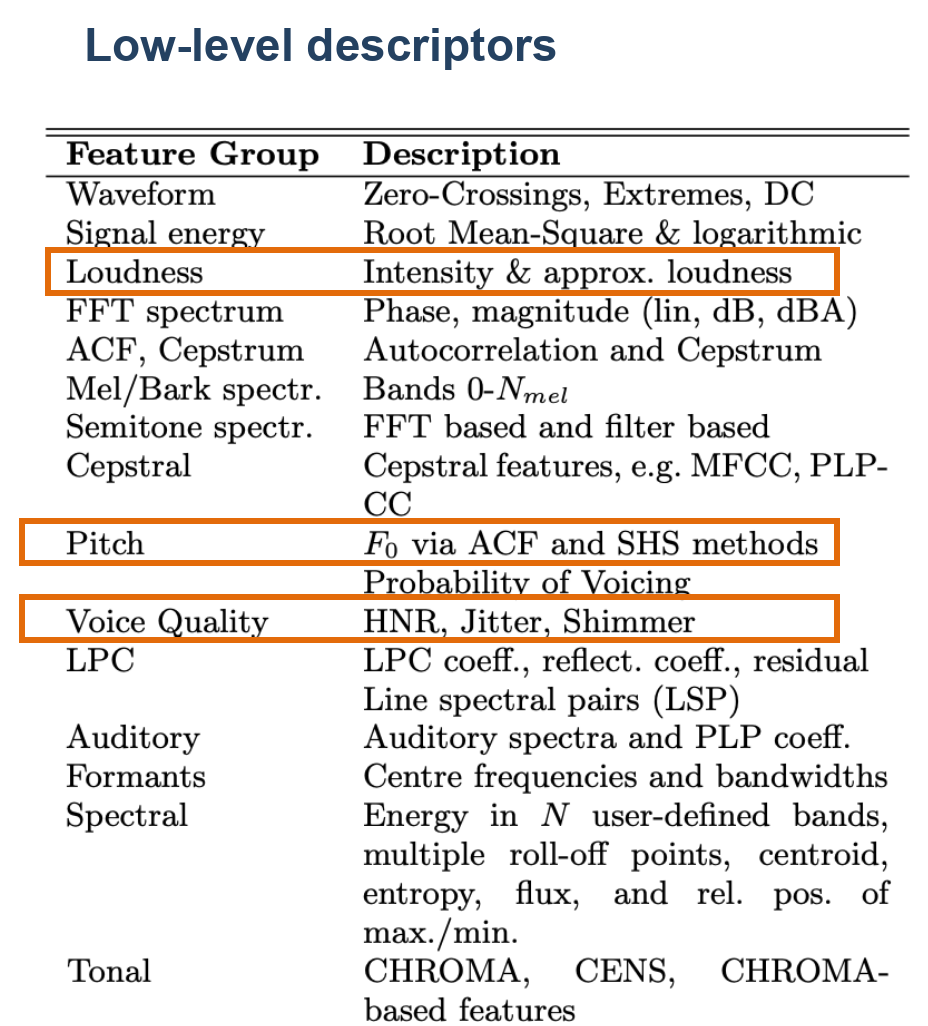
    
   
Before we look at the different features, lets see how to extract them using OpenSMile. The below cell provides the code to extract a feature set from a speech signal.

In [11]:
#configuration for what are the features that are extracted by opensmile. 
smile_ComParE_2016_lld = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

#change the path to your file 
features_extracted_lld = smile_ComParE_2016_lld.process_file('./output_mono.wav')

#configuration for what are the features that are extracted by opensmile. 
smile_ComParE_2016_functionals = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)
#change the path to your file 
features_extracted_functionals = smile_ComParE_2016_functionals.process_file('./output_mono.wav')

In [ ]:
#list of all the low level descriptor feature names
smile_ComParE_2016_lld.feature_names

In [ ]:
#list of all the functional feature names
smile_ComParE_2016_functionals.feature_names

In [ ]:
#dataframe of the low level features extracted
features_extracted_lld

In [ ]:
#dataframe of the functional features extracted 
features_extracted_functionals

#### Loudness 
The amplitude of the vibrations (i.e. the size of the oscillations of the vocal folds) that affects loudness: The greater the amplitude of the vibrations, the greater the amount of energy carried by the wave, and the more intense the sound will be.
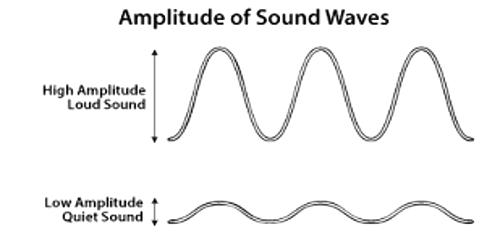
[source](https://www.sltinfo.com/loudness/)
    

In [ ]:
#plot for the Intensity
plt.plot(features_extracted_lld["audspec_lengthL1norm_sma"].values)

#### Task 3.5  Analysis of Loudness: Calculate the mean, median, range, standard deviation and plot the histogram. Do this seperatly for the different affective parts (only for the speaking part) and compare the results. In the below cell write about your observations. Within your observation try to incorporate relevant aspects about these features that you have been introduced to in the lecture.

In [ ]:
###############################
#     your code goes here     #
###############################
# Calculate the mean, median, range, standard deviation and plot the histograms of loudness




*Your interesting findings* :

#### Fundamental Frequency ($F_0 $)
The  fundamental  frequency,  measured  in  Hertz,  is  defined  as  the  number  of  times  a  sound  wave  produced  by  the  vocal  cords repeats during a given time period. It has a typical range of values it can take depending on the gender and age of the person. 
    
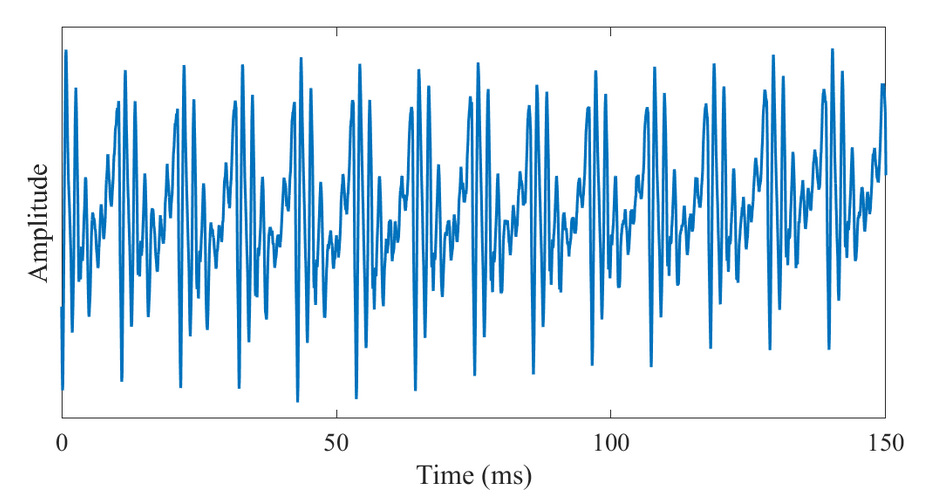
A speech signal with a fundamental frequency of approximately F0=93Hz.[source](https://wiki.aalto.fi/pages/viewpage.action?pageId=149890776)



#### *Plot of the fundamental frequency over time:*

In [ ]:
#plot for the fundamental frequency 
plt.plot(features_extracted_lld["F0final_sma"].values)
#each time interval is 1ms
plt.xlabel('Time-intervals')
plt.ylabel('Frequency')

#### Task 3.6 Analysis of Fundamental Frequency:Calculate the mean, median, range, standard deviation and plot the histogram. Do this seperatly for the different affective parts (only for the speaking part) and compare the results.  In the below cell write about your observations.(within your observation try to incorporate relevant aspects about these features that you have been introduced to in the lecture) 

In [ ]:
###############################
#     your code goes here     #
###############################
# Calculate the mean, median, range, standard deviation and plot the histograms of fundamental frequency






*Your interesting findings* :

#### Jitter and Shimmer
Measurements  of  F0  disturbance has  proven  to  be  useful  in  describing  the  vocal  characteristics. The two important disturbances are Jitter and Shimmer. Jitter  is  defined  as  the  parameter  of  frequency  variation  from  cycle  to  cycle,  and  shimmer  relates  to  the  amplitude  variation  of  the  sound  wave. 

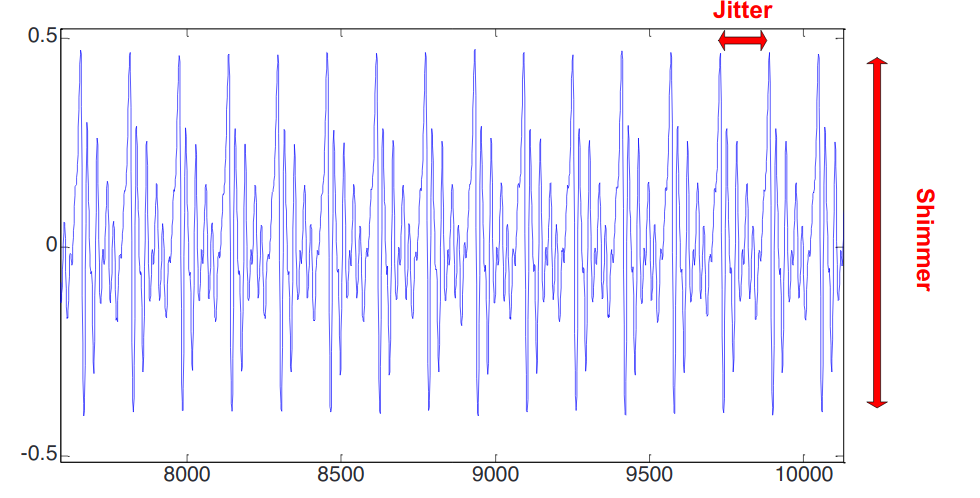 [source](https://www.sciencedirect.com/science/article/pii/S2212017313002788)

In [ ]:
#plot for shimmer
plt.plot(features_extracted_lld["shimmerLocal_sma"].values)

In [ ]:
#plot for jitter
plt.plot(features_extracted_lld["jitterLocal_sma"].values)    

#### Task 3.7 and 3.8 Analysis of Jitter and Shimmer: Calculate the mean, median, range, standard deviation and plot the histogram. Do this seperatly for the different affective parts (only for the speaking part) and compare the results. In the below cell write about your observations.(within your observation try to incorporate relevant aspects about these features that you have been introduced to in the lecture) 

In [ ]:
###############################
#     your code goes here     #
###############################
# Calculate the mean, median, range, standard deviation and plot the histograms of shimmer






In [ ]:
###############################
#     your code goes here     #
###############################
# Calculate the mean, median, range, standard deviation and plot the histograms of Jitter 





#### Mfcc coeffiecients

#### Task 3.9. Plot the Mfcc coeffiecients over the whole speaking part.

Here is an example of possible solution:
![example of possible solution](voice.png)

In [ ]:
###############################
#     your code goes here     #
###############################
# get all the mfcc co-efficients from the extracted features dataframe and plot them as shown below
# You first need to filter the dataframe to get the mfcc coeffiecient

